<a href="https://colab.research.google.com/github/Sophie-X31/Google-COVID-19-open-data-/blob/main/Computer_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Very Brief Introduction to Pandas

Below is a illustration of how to work with CSV files using the Pandas library in Python. 

In [21]:
import pandas as pd

We use pd.read_csv to read csv into a dataframe, which is an object in pandas. 

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/Sophie-X31/Google-COVID-19-open-data-/main/data_example%20(1).csv')
print(type(df)) # csv is read into a dataframe

<class 'pandas.core.frame.DataFrame'>


In [23]:
df.head() # this shows the header of df, note column 'Name' is no treated as the index of rows

,Name,Data1,Data2,Data3
0,Adam,0.059424,0.112827,0.612733
1,Baker,0.462225,0.751162,0.160582
2,Charlie,0.696168,0.520210,0.783381
3,David,0.127851,0.627776,0.960524
4,Edward,0.755044,0.671086,0.268443


In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/Sophie-X31/Google-COVID-19-open-data-/main/data_example%20(1).csv', index_col='Name')
df.head() # column 'Name' is now set to be the index of rows

,Data1,Data2,Data3
Name,,,
Adam,0.059424,0.112827,0.612733
Baker,0.462225,0.751162,0.160582
Charlie,0.696168,0.520210,0.783381
David,0.127851,0.627776,0.960524
Edward,0.755044,0.671086,0.268443


In [25]:
print(df.loc['Baker'])

Data1    0.462225
Data2    0.751162
Data3    0.160582
Name: Baker, dtype: float64


Here are a few ways to navigate dataframe.

In [26]:
# print(df[['Data1', 'Data3']])
print(df.loc[['Adam', 'David']][['Data1', 'Data2']])

          Data1     Data2
Name                     
Adam   0.059424  0.112827
David  0.127851  0.627776


In [27]:
df_np = df.to_numpy() # this tranforms the data into a numpy array, note that we did not import numpy
type(df_np)

numpy.ndarray

# QQ Plot

A QQ plot, or quantile-quantile plot, is a graphical tool used to assess if a set of data follows a specific distribution. The QQ plot compares the quantiles of the data to the quantiles of the chosen distribution.

In [28]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

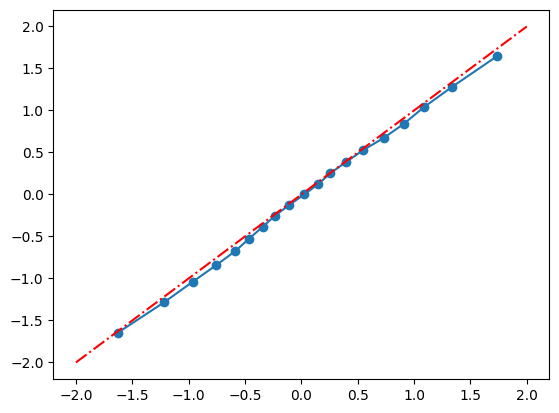

In [29]:
data = np.random.normal(0,1,size=1000)
u = np.linspace(0,1,21) # this generates 21 evenly spaced values between 0 and 1, inclusive
q_emp = np.quantile(data, u) # this gives the empirical quantile of the data at each entry of u
q_norm = stats.norm.ppf(u) # it's important that entries of q_emp and q_norm correpond to the same u
plt.plot(q_emp, q_norm,'-o') # qq plot
plt.plot([-2,2],[-2,2],'r-.')
plt.show()

If the data follows the chosen distribution, QQ plot should lie approximately along a straight line with a 45-degree angle. If the QQ plot deviates from the 45-degree-straight line, this suggests that the data may not follow the chosen distribution. Can you explain why the QQ plot below deviate in this specific way? 

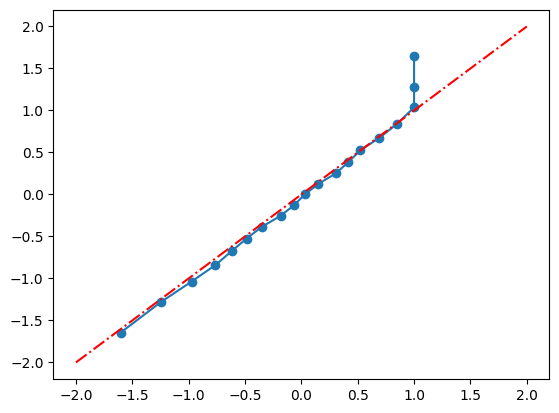

In [30]:
data2 = np.minimum(np.random.normal(0,1,size=1000),1)
q_emp2 = np.quantile(data2, u)
plt.plot(q_emp2, q_norm, '-o') # qq plot
plt.plot([-2,2],[-2,2],'r-.')
plt.show()

# Problem 1

Read the file 'data.csv'. Suppose the data is generated from $N(\mu,\sigma^2)$. Estimate $\mu$ and $\sigma^2$, and print out the values of your estimates. Plot in the same figure the histogram of the data with 'Density = True' and the normal PDF with your estimates. Draw the QQ plot as well.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import norm, laplace

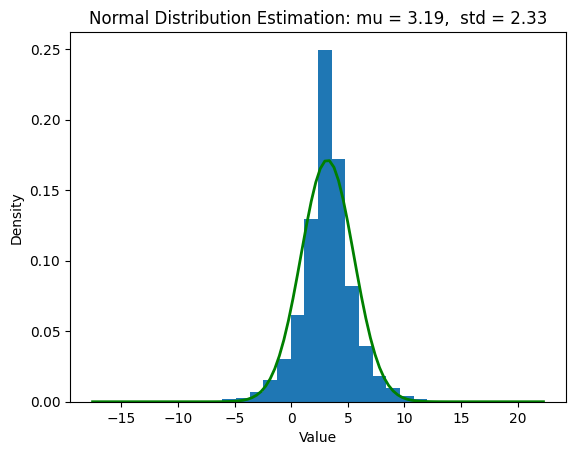

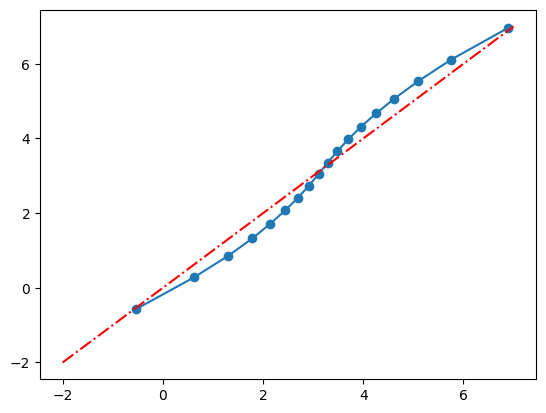

In [34]:
## Read in Dataset
df2 = pd.read_csv('https://raw.githubusercontent.com/Sophie-X31/Google-COVID-19-open-data-/main/data%20(1).csv')
mean, std = norm.fit(df2)
estimate = 'mu = %.2f,  std = %.2f'%(mean, std)

## Plot Histogram
ax1 = plt.hist(df2, bins=30, density=True)
plt.ylabel('Density')
plt.xlabel('Value')

## Plot PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, linewidth=2, color='green')
plt.title('Normal Distribution Estimation: ' + estimate)
plt.show()

## QQ Plot
u = np.linspace(0, 1, 20)
q_emp = np.quantile(df2, u)
q_norm = stats.norm.ppf(u, loc=mean, scale=std)
plt.plot(q_emp, q_norm, '-o')
plt.plot([-2,7],[-2,7],'r-.')
plt.show()

# Problem 2

Suppose instead the data is generated from double exponential distribution with PDF below
\begin{align*}
f(x) = \frac{1}{2\lambda}\exp\Big(-\frac{|x-a|}{\lambda}\Big),\quad x\in\mathbb{R},
\end{align*}
where $a\in\mathbb R$ and $\lambda>0$ are parameters. Estiamte $a$ and $\lambda$, and print out the values of your estimates. Plot in the same figure the histogram and the PDF. Draw the QQ plot. Explain what you find. You do not need to show the detailed derivation of the estimators and the quantile function. You may use simulated quantile instead of the theoritical one.

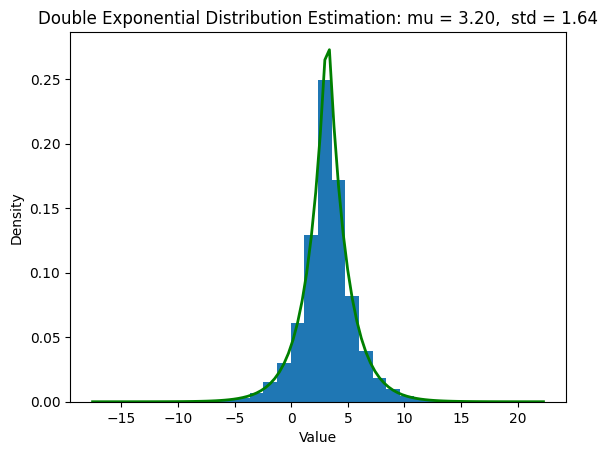

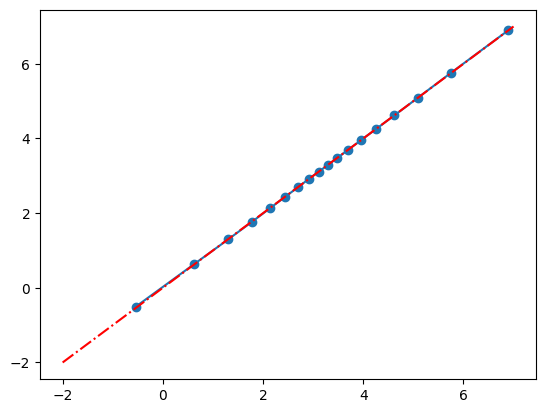

In [35]:
## Read in Dataset
df2 = pd.read_csv('https://raw.githubusercontent.com/Sophie-X31/Google-COVID-19-open-data-/main/data%20(1).csv')
mean, std = laplace.fit(df2)
estimate = 'mu = %.2f,  std = %.2f'%(mean, std)

## Plot Histogram
ax1 = plt.hist(df2, bins=30, density=True)
plt.ylabel('Density')
plt.xlabel('Value')

## Plot PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = laplace.pdf(x, mean, std)
plt.plot(x, p, linewidth=2, color='green')
plt.title('Double Exponential Distribution Estimation: ' + estimate)
plt.show()

## QQ Plot
u = np.linspace(0, 1, 20)
q_emp = np.quantile(df2, u)
q_exp = stats.laplace.ppf(u, loc=mean, scale=std)
plt.plot(q_emp, q_exp, '-o')
plt.plot([-2,7],[-2,7],'r-.')
plt.show()

The QQ-plot illustrates the relationship betweention the theorectically computed quantile points and the quantile points from the empirical observations almost perfectly aligns with the 45 degree line. This provides evidence that the given dataset follows a double exponential distribution, as the estimation of parameters of the probability density function, and the theorectical quantile values are both based on the double exponential function (i.e. laplace from scipy)

